# Data Wrangling Project - 1.

In [82]:
# import libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import copy
%matplotlib inline

## Gather

In [2]:
# Downlaod image predictions
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv','wb') as f:
    f.write(r.content)

In [3]:
#### twitter-archive-enhanced.csv file
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
# Flat file reading using pandas Dataframe
df_2 = pd.read_csv('image-predictions.tsv', sep= '\t')
df_2.head(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Extract tweet id, retweets and tweet favorites from tweet-json.txt file to a pandas Dataframe

In [5]:
tweet_list = []

with open('tweet-json.txt', encoding = 'utf-8') as f:
    each_tweet = f.readlines()
    for i in range(len(each_tweet)):
        tweet = json.loads(each_tweet[i])
        id = tweet['id']
        retweet = tweet['retweet_count']
        like = tweet['favorite_count']
        tweet_list.append({'tweet_id': id,
                          'retweets':retweet,
                          'tweet_favorites': like,
                          })
df_3 = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweets', 'tweet_favorites'])        

In [6]:
# check the final output
df_3.head()

,tweet_id,retweets,tweet_favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assess

In [7]:
# copy twitter-archive-enhanced file
archive = df_1.copy()   

In [8]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
356,830583320585068544,NaN,NaN,2017-02-12 01:04:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilly. She just parallel barked. Kindl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
637,793286476301799424,NaN,NaN,2016-11-01 03:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
1200,716730379797970944,NaN,NaN,2016-04-03 20:53:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There has clearly been a mistake. Pup did noth...,NaN,NaN,NaN,https://twitter.com/chpsanfrancisco/status/716...,12,10,None,None,None,None,None
464,817415592588222464,NaN,NaN,2017-01-06 17:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,NaN,NaN,NaN,https://www.gofundme.com/help-strudel-walk-aga...,11,10,Strudel,None,None,None,None
2100,670704688707301377,NaN,NaN,2015-11-28 20:43:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Danny. He's too good to look at the road ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670704688...,6,10,Danny,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
1325,706166467411222528,NaN,NaN,2016-03-05 17:16:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He's a shy pup. Doesn't bark m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706166467...,7,10,Dexter,None,None,None,None
980,749774190421639168,NaN,NaN,2016-07-04 01:17:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,None,None,None,None
1934,674014384960745472,NaN,NaN,2015-12-07 23:55:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Aiden. His eyes are magical. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674014384...,11,10,Aiden,None,None,None,None


In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# copy image-predictions
predictions = df_2.copy()

In [11]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
archive.tweet_id.duplicated().value_counts()


False    2356
Name: tweet_id, dtype: int64

In [13]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# copy tweeter information file
tweet_info = df_3.copy()
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
retweets           2354 non-null int64
tweet_favorites    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Quality

***archive table***
- in_reply_to_status id and in_reply_to_user id columns names are needs to be changed
- retweeted_status_id is a float 
- retweeted_status_user_id is a float
- timestamp has validity issue
- retweeted timestamp is a string format not a datetime
- timestamp is a string format not a datetime
- dog names are not always correct

***predictions table***
- p1, p2 and p3 algorithm namings are not consistent with the combination of lowercase and uppercase
- p1, p2 and p3 algorithm names are separated with underscore
- missing records 2075 not 2356
- prediction output column are needed to be rearranged
- confidence algorithm names needs to be changed
- rename jpg_url column


***tweet info table***
- missing records 2354 not 2356



#### Tidiness

***archive table***
- timestamp date and time in one column
- dog stages columns are need to be single one column

## Clean

### 1. Quality 

#### Define

***archive table***
- in_reply_to_status id and in_reply_to_user id columns names are needs to be changed
- remove '+0000' from timestamp  
- convert retweeted_status_id from a float to int 
- convert retweeted_status_user_id from a float to int
- convert retweeted timestamp from a string to a datetime
- remove lowercase letters from names columns and replace with 'None' to NaN

***predictions table***
- p1, p2 and p3 algorithm namings are not consistent with the combination of lowercase and uppercase
- p1, p2 and p3 algorithm names are separated with underscore
- missing records 2075 not 2356
- prediction output column are needed to be rearranged
- confidence algorithm names needs to be changed
- rename jpg_url column


#### Code

In [15]:
# 1. in_reply_to_status id and in_reply_to_user id columns names are needs to be changed
archive = archive.rename(columns = {'in_reply_to_status_id': 'statsus_id', 'in_reply_to_user_id': 'user_id'})


In [16]:
# 2. remove '+0000' from timestamp 
archive.timestamp = archive.timestamp.str[:-5]
archive

,tweet_id,statsus_id,user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
# 3.Convert retweeted_status_id from a float to int
archive.retweeted_status_id = archive.retweeted_status_id.fillna(-1)
archive.retweeted_status_id = archive.retweeted_status_id.astype(int)
archive.retweeted_status_id = archive.retweeted_status_id.astype(str)
archive.retweeted_status_id = archive.retweeted_status_id.replace('-1', np.nan)


In [18]:
# 4. Convert retweeted status__user_id from a float to int
archive.retweeted_status_user_id = archive.retweeted_status_user_id.fillna(-1)
archive.retweeted_status_user_id = archive.retweeted_status_user_id.astype(int)
archive.retweeted_status_user_id = archive.retweeted_status_user_id.astype(str)
archive.retweeted_status_user_id = archive.retweeted_status_user_id.replace('-1', np.nan)


In [19]:
# 5. Convert retweeted timestamp from a string to a datetime
archive.retweeted_status_timestamp = pd.to_datetime(archive.retweeted_status_timestamp)


In [20]:
# 6. remove lowercase letters from 'name' column and replace with NaN
# Little explanation: from visaul assessment we can see that dog names are usually started with uppercase
# Thus, we need to remove othe string formats to make more cleaned
for i in archive.name:
    if i[0].isupper() == False or i == 'None':
        archive.name = archive.name.replace(i, np.nan)
        

In [21]:
# 7. p1, p2 and p3 algorithm namings are not consistent with the combination of lowercase and uppercase
predictions.p1 = predictions.p1.str.lower()

predictions.p2 = predictions.p2.str.lower()

predictions.p3 = predictions.p3.str.lower()


In [22]:
# 8. p1, p2 and p3 algorithm names are separated with underscore
predictions.p1 = predictions.p1.replace('_',' ', regex=True)
predictions.p2 = predictions.p2.replace('_',' ', regex=True)
predictions.p3 = predictions.p3.replace('_',' ', regex=True)



In [23]:
# 9. Prediction output column are needed to be rearranged
predictions = predictions[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf',
                          'p1_dog', 'p2_dog', 'p3_dog']]

In [24]:
# 10. Confidence levels column's names needs to be changed
predictions = predictions.rename(columns = {'p1_conf': 'p1_confidence', 'p2_conf':'p2_confidence', 'p3_conf':'p3_confidence'})

In [25]:
# 11. the link for image column name is needed to be renamed
predictions = predictions.rename(columns = {'jpg_url': 'img_url'})


In [26]:
predictions.head()

,tweet_id,img_url,img_num,p1,p2,p3,p1_confidence,p2_confidence,p3_confidence,p1_dog,p2_dog,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,collie,shetland sheepdog,0.465074,0.156665,0.061428,True,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature pinscher,rhodesian ridgeback,0.506826,0.074192,0.072010,True,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,malinois,bloodhound,0.596461,0.138584,0.116197,True,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,redbone,miniature pinscher,0.408143,0.360687,0.222752,True,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,rottweiler,doberman,0.560311,0.243682,0.154629,True,True,True


In [27]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         2075 non-null int64
img_url          2075 non-null object
img_num          2075 non-null int64
p1               2075 non-null object
p2               2075 non-null object
p3               2075 non-null object
p1_confidence    2075 non-null float64
p2_confidence    2075 non-null float64
p3_confidence    2075 non-null float64
p1_dog           2075 non-null bool
p2_dog           2075 non-null bool
p3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 2. Tidiness

#### Define

- timestamp date and time in one column
- dog stages columns are need to be single one column

In [28]:
archive.head()

,tweet_id,statsus_id,user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Code

In [29]:
# 1. timestamp column will be divided into date and time columns 
l = archive.timestamp.str.split(' ', expand=True)
archive['date'] = l[0]
archive['time'] = l[1]
archive.drop(columns = 'timestamp', inplace = True)
# set the column order
archive = archive[['tweet_id', 'statsus_id', 'user_id', 'date', 'time', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'
       ]]

In [30]:
# 2. dog stage columns are made into one single column
# separate all stage columns for dog 
s = archive[['doggo', 'floofer', 'pupper', 'puppo']]
t = ['doggo', 'floofer', 'pupper', 'puppo']
l = []
k = []
index = 0
for index, i in s.iterrows():
    count = 0
    for j in range(len(i)):
        if i[j] in t:
            l.append(i[j])
            k.append(index)

stages = pd.DataFrame(l, index=k)
stages.columns = ['stage']

# rejoin stage column to the main 'archive' dataframe
archive = archive.join(stages)

archive = archive.drop(columns = t)

#### Test

In [31]:
archive.head()

,tweet_id,statsus_id,user_id,date,time,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01,16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01,00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31,00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30,15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29,16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Additional quality after tidiness

In [32]:
archive.date = pd.to_datetime(archive.date)

In [33]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2370 non-null int64
statsus_id                    79 non-null float64
user_id                       79 non-null float64
date                          2370 non-null datetime64[ns]
time                          2370 non-null object
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null object
retweeted_status_user_id      183 non-null object
retweeted_status_timestamp    183 non-null datetime64[ns]
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          1506 non-null object
stage                         394 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(8)
memory usage: 296.2+ KB


### Final 

In [34]:
# merege all there dataframes which are archive, predictions and tweet_info
# first merge predictions and tweet_info
pre = pd.merge(predictions, tweet_info, on = 'tweet_id')
# create final datagrame file
twitter_archive_master = pd.merge(archive, pre, on = 'tweet_id')

In [36]:
twitter_archive_master.columns

Index(['tweet_id', 'statsus_id', 'user_id', 'date', 'time', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'img_url', 'img_num', 'p1', 'p2',
       'p3', 'p1_confidence', 'p2_confidence', 'p3_confidence', 'p1_dog',
       'p2_dog', 'p3_dog', 'retweets', 'tweet_favorites'],
      dtype='object')

## Analyzing and Visualizing

#### Insights
- what is the most retweeted dog?
- What is the most liked dog?
- What is the most common Dog name?
- What algorithm is common for p1 prediction?

#### Visualization
- Which stage of dog is more favorite?
- How retweet rate is changed over the years?

In [35]:
# 1. Most retweeted dog
twitter_archive_master[twitter_archive_master['retweets'] == twitter_archive_master['retweets'].max()]

,tweet_id,statsus_id,user_id,date,time,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p2,p3,p1_confidence,p2_confidence,p3_confidence,p1_dog,p2_dog,p3_dog,retweets,tweet_favorites
862,744234799360020481,NaN,NaN,2016-06-18,18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaT,...,ice bear,whippet,0.825333,0.044681,0.018442,True,False,True,79515,131075


In [37]:
# 2. The most favoite dog
twitter_archive_master[twitter_archive_master['tweet_favorites'] == twitter_archive_master['tweet_favorites'].max()]

,tweet_id,statsus_id,user_id,date,time,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p2,p3,p1_confidence,p2_confidence,p3_confidence,p1_dog,p2_dog,p3_dog,retweets,tweet_favorites
331,822872901745569793,NaN,NaN,2017-01-21,18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,NaN,NaT,...,labrador retriever,irish terrier,0.196015,0.160329,0.069126,True,True,True,48265,132810


In [58]:
# Common dog name
twitter_archive_master.name.value_counts()[0:1]

Charlie    11
Name: name, dtype: int64

In [67]:
twitter_archive_master.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 28 columns):
tweet_id                      2086 non-null int64
statsus_id                    24 non-null float64
user_id                       24 non-null float64
date                          2086 non-null datetime64[ns]
time                          2086 non-null object
source                        2086 non-null object
text                          2086 non-null object
retweeted_status_id           81 non-null object
retweeted_status_user_id      81 non-null object
retweeted_status_timestamp    81 non-null datetime64[ns]
expanded_urls                 2086 non-null object
rating_numerator              2086 non-null int64
rating_denominator            2086 non-null int64
name                          1400 non-null object
stage                         333 non-null object
img_url                       2086 non-null object
img_num                       2086 non-null int64
p1                     

#### Visualization

(array([735903., 735964., 736024., 736085., 736146., 736208., 736269.,
        736330., 736389., 736450., 736511., 736573.]),
 <a list of 12 Text xticklabel objects>)

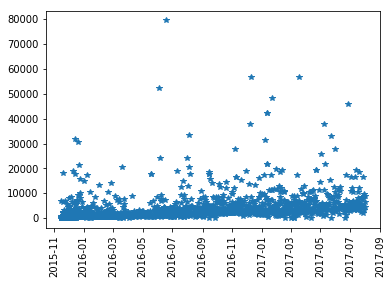

In [96]:
# Which stage of dog is more favorite?
t = twitter_archive_master.sort_values('date', ascending = True)
plt.plot(t['date'], t['retweets'], '*');
plt.xticks(rotation = 'vertical')


In [88]:
tweet_favorites = t[['retweets', 'tweet_favorites']]
k = tweet_favorites.corr()


,retweets,tweet_favorites
retweets,1.000000,0.789513
tweet_favorites,0.789513,1.000000


(array([735903., 735964., 736024., 736085., 736146., 736208., 736269.,
        736330., 736389., 736450., 736511., 736573.]),
 <a list of 12 Text xticklabel objects>)

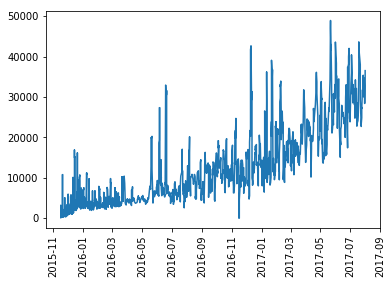

In [97]:
retweets = t['retweets'].rolling(window=5).mean()
plt.plot(t['date'],t['tweet_favorites'].rolling(window=5).mean())
plt.xticks(rotation = 'vertical')